In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import pandas as pd
import numpy as np



Fastai is a high-level library that provides an easy-to-use interface for creating and training deep learning models. It includes utilities for data processing, model building, and training, among other things.<br>
 Fastai’s vision library. This module provides tools for computer vision tasks, such as image classification, object detection, and segmentation. <br>
 The error_rate metric is commonly used to evaluate the performance of classification models. It measures the proportion of incorrect predictions, which is essentially the error rate of the model.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

os.environ['KAGGLE_CONFIG_DIR']='/content': This sets an environment variable called KAGGLE_CONFIG_DIR.<br>

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [02:11<00:00, 18.5MB/s]
100% 2.29G/2.29G [02:11<00:00, 18.7MB/s]


exclamation mark (!) allows you to run shell commands directly from a code cell.<br>
 ZIP file named chest-xray-pneumonia.zip located in the /content directory.
<br>
-d /content/chest-xray-pneumonia: The -d option specifies the destination directory where the contents of the ZIP file will be extracted. Here, it's set to /content/chest-xray-pneumonia. If the directory does not exist, it will be created.

In [ ]:
!unzip /content/chest-xray-pneumonia.zip -d /content/chest-xray-pneumonia

Streaming output truncated to the last 5000 lines.
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/

In [ ]:
path = '/content/chest-xray-pneumonia/chest_xray'

This code snippet is using the Fastai library to create an ImageDataLoaders object for loading image data from a folder<br>
ImageDataLoaders.from_folder: This method creates a data loader for images from a directory structure. It automatically handles splitting data into training and validation sets, applying transformations, and creating DataLoaders.
<br>
Parameters:
<br>
path: This is the path to the root directory containing the dataset. In this case, path should be a variable or string that specifies where your image data is stored.
<br>
train='.': This specifies the subdirectory within path to be used for training data. The '.' denotes the current directory, meaning it uses the root directory specified in path for training. If your dataset is organized with separate directories for training and validation data, you would adjust this parameter accordingly.
<br>
valid_pct=0.2: This parameter specifies the fraction of the dataset to be used for validation. Here, 0.2 means that 20% of the data will be used for validation, and the remaining 80% will be used for training.
<br>
seed=42: This sets the random seed for splitting the data into training and validation sets. Using a seed ensures that the split is reproducible; running the code multiple times with the same seed will yield the same split.
<br>
item_tfms=Resize(224): This applies a transformation to each image item before batching. Resize(224) resizes all images to 224x224 pixels. This is typically done to ensure that all images are of the same size, which is required for most deep learning models.
<br>
Return Value:
<br>
The ImageDataLoaders.from_folder method returns an ImageDataLoaders object, which contains DataLoader objects for both training and validation datasets. These DataLoaders handle batching and shuffling of data during model training.<br>
In summary, this code snippet sets up data loaders for an image dataset, splitting it into training and validation sets, resizing images to 224x224 pixels, and using a fixed seed for reproducibility. Make sure that the path variable points to the correct directory containing your dataset.

In [ ]:
data = ImageDataLoaders.from_folder(
            path ,
            train = '.' ,
            valid_pct = 0.2,
            seed = 42,
            item_tfms = Resize(224)
                        )

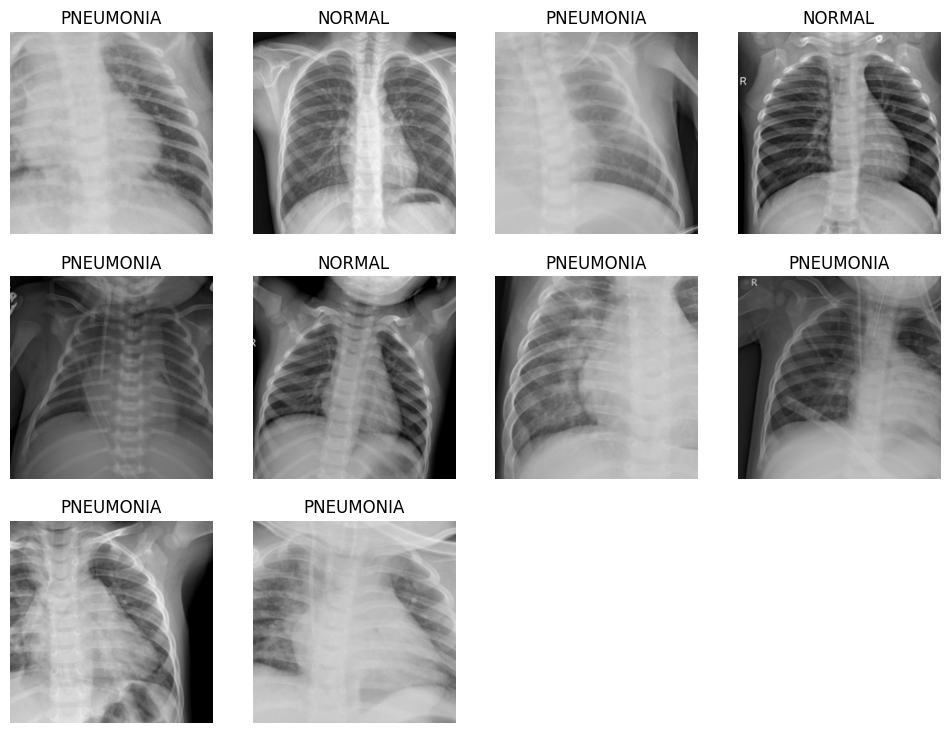

In [ ]:
data.show_batch(max_n = 10) # to visualize a batch of images from your dataset.

In [ ]:
learn  = vision_learner(data,models.resnet50,metrics = [accuracy],model_dir = Path('Path'),path = Path('.'))

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 185MB/s]


vision_learner: This is a Fastai utility function that creates a Learner object for image classification. It initializes a deep learning model and sets up the necessary components for training, including the model architecture, data, and metrics.

data: This is your ImageDataLoaders object, which contains the training and validation data. It should be created using ImageDataLoaders.from_folder or a similar method.

models.resnet50: This specifies the architecture of the model you want to use. In this case, you are using ResNet-50, a popular pre-trained convolutional neural network model available in the Fastai library.

metrics=[accuracy]: This specifies the evaluation metric(s) for the model. Here, you’re using accuracy, which will be used to evaluate how well the model performs during training and validation. Accuracy is a common metric for classification tasks, indicating the proportion of correct predictions.

model_dir=Path('Path'): This specifies the directory where the model's weights and other related files will be saved. Path('Path') should be replaced with the actual directory path where you want to save the model files. If you're using Google Colab or Jupyter notebooks, you might use something like Path('/content/models').

path=Path('.'): This specifies the directory where the data is located. Path('.') refers to the current working directory. If your data is in a different directory, you should specify the appropriate path.

<br><br><r>
It performs a learning rate range test, which helps you identify the optimal learning rate for your model. The goal is to find a learning rate where the loss decreases rapidly without causing instability or divergence.<br>
learn.lr_find() starts by training the model for a few iterations with a range of learning rates that increase exponentially. It begins with a very low learning rate and gradually increases it.

Loss Tracking: As the learning rate increases, it tracks the loss value. Typically, the loss will decrease initially as the learning rate increases, but after a certain point, the loss will start to increase and become unstable.

Plotting: After running, it plots the learning rate against the loss. This plot usually shows a sharp drop in loss at lower learning rates and then a steep increase as the learning rate becomes too high.

Interpreting the Plot
Look for the Sweet Spot: In the plot, you’ll see a region where the loss decreases smoothly. The ideal learning rate is typically just before the loss starts to increase sharply. This point indicates a good balance between learning speed and stability.

Recommended Learning Rate: A common approach is to choose a learning rate around the point where the loss is decreasing rapidly and hasn’t yet started to rise. Sometimes, selecting a learning rate a bit lower than the point where the loss begins to increase can be beneficial.

X-Axis: Learning rates (log scale).
Y-Axis: Loss values.
"Sweet Spot": Look for a region where the loss decreases sharply. The ideal learning rate is typically a bit before the loss starts increasing dramatically.

SuggestedLRs(valley=0.0008317637839354575)

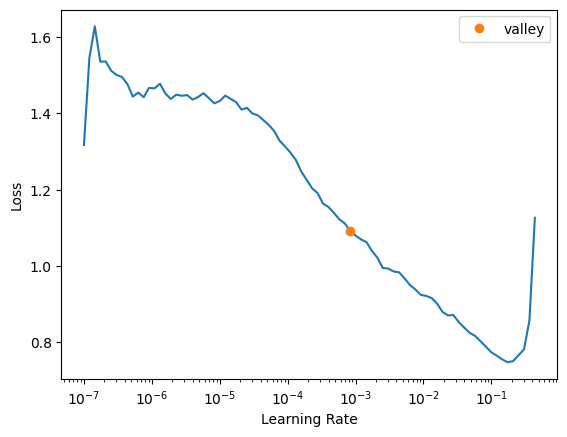

In [ ]:
learn.lr_find() #to find an appropriate learning rate for training your model

In [ ]:
# Choose learning rate on right side of point

In [ ]:
lr1 = 1e-3 # This sets the lower bound of the learning rate range to 0.001.
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2)) #This trains the model using the one-cycle learning rate policy.
'''
4: This is the number of epochs to train for. The model will undergo 4 complete passes through the training data.

slice(lr1, lr2): This specifies a learning rate range for the training process. The slice function creates a

learning rate schedule that starts at lr1, increases to lr2, and then decreases back to a lower value.

This range will be used by the learning rate scheduler to adjust the learning rate during training.
'''

epoch,train_loss,valid_loss,accuracy,time
0,0.506152,0.186742,0.966268,04:35
1,0.339162,0.090873,0.965414,04:44
2,0.139133,0.063849,0.976516,04:46
3,0.100237,0.067204,0.977797,04:54


One-Cycle Learning Rate Policy
The fit_one_cycle method implements the one-cycle learning rate policy, which is a powerful learning rate schedule strategy. Here’s how it works:

Initial Phase: The learning rate starts at a lower value (lr1) and increases up to a maximum value within the range (lr2). This helps the model to quickly adapt to the data.

Annealing Phase: After reaching the maximum learning rate, the learning rate then decreases back to a lower value. This helps to refine the weights and stabilize the training.

Cyclical Learning Rate: The one-cycle policy is known for reducing overfitting and achieving better convergence compared to static learning rates or traditional learning rate schedules.

In [ ]:
interpret = ClassificationInterpretation.from_learner(learn)

to create an interpretation object for your classification model. This object provides various methods and tools to help you understand how well your model is performing and diagnose potential issue<br>


In [ ]:
interpret.plot_confusion_matrix()

In [ ]:
img = PILImage.create('/content/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0003-0001.jpeg')

to create a PILImage object from an image file. This is useful when you want to load and work with a specific image from disk in Fastai.


<Axes: >

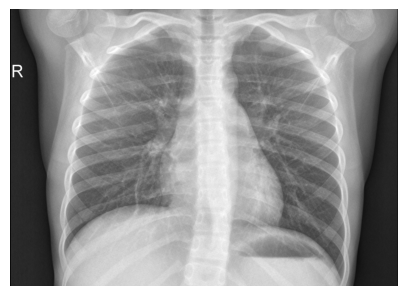

In [ ]:
img.show()

In [ ]:
print(learn.predict(img)[0])

NORMAL


[0]: This accesses the first element of the tuple returned by learn.predict(img), which is the predicted class label (pred_class).

In [ ]:
img1= PILImage.create('/content/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person109_bacteria_526.jpeg')

<Axes: >

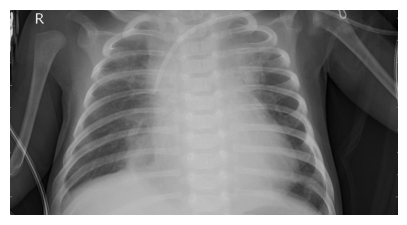

In [ ]:
img1.show()

In [ ]:
print(learn.predict(img1)[0])

PNEUMONIA
